<a href="https://colab.research.google.com/github/faseenafarz/machine-learning/blob/main/networkanalysis_and_anomaly_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import the Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
#Import the libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Read the dataset
df=pd.read_csv('/content/Unicauca-dataset-April-June-2019-Network-flows.csv')
#Displaying the first rows of dataset
df.head()

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service
0,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,22,7620,328,...,1.555955e+09,1.554399e+12,0.010354,198.657965,51.689181,84.916348,2.0,Network,Unknown,DHCP
1,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,17,5670,328,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,DHCP
2,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,43,15124,328,...,1.555965e+09,1.554409e+12,0.022332,340.268454,89.927588,124.270745,2.0,Network,Unknown,DHCP
3,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,30,10086,328,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,DHCP
4,cfa7c2740072befaa89c202499729e08,3232266497,192.168.121.1,0,10.130.1.166,0,1,1,56,56,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,ICMP


In [3]:
df.shape

(92478, 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92478 entries, 0 to 92477
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flow_key              92478 non-null  object 
 1   src_ip_numeric        92478 non-null  int64  
 2   src_ip                92478 non-null  object 
 3   src_port              92478 non-null  int64  
 4   dst_ip                92478 non-null  object 
 5   dst_port              92478 non-null  int64  
 6   proto                 92478 non-null  int64  
 7   pktTotalCount         92478 non-null  int64  
 8   octetTotalCount       92478 non-null  int64  
 9   min_ps                92478 non-null  int64  
 10  max_ps                92478 non-null  int64  
 11  avg_ps                92478 non-null  float64
 12  std_dev_ps            92478 non-null  float64
 13  flowStart             92478 non-null  float64
 14  flowEnd               92478 non-null  float64
 15  flowDuration       

In [5]:
df.describe()

,src_ip_numeric,src_port,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,...,b_avg_ps,b_std_dev_ps,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason
count,9.247800e+04,92478.000000,92478.000000,92478.000000,92478.000000,9.247800e+04,92478.000000,92478.000000,92478.000000,92478.000000,...,92477.000000,92477.000000,9.247700e+04,9.247700e+04,9.247700e+04,92477.000000,92477.000000,92477.000000,92477.000000,92477.000000
mean,3.232267e+09,50396.983812,2069.060058,11.104284,87.983910,1.023160e+05,55.619542,1530.561723,259.355164,327.743713,...,364.329792,332.064760,1.437213e+09,1.437213e+09,7.109374e+11,1.834672,14.120874,3.822628,3.584798,2.619192
std,1.245338e+02,14798.835111,7453.206215,5.491292,1466.187778,1.797262e+06,55.384147,3767.668665,464.798689,734.421041,...,950.555563,822.393616,4.131302e+08,4.131302e+08,7.743793e+11,34.751593,56.182856,36.335530,14.593129,0.799343
min,3.232266e+09,0.000000,0.000000,1.000000,1.000000,2.900000e+01,29.000000,29.000000,29.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.232267e+09,50089.000000,53.000000,6.000000,2.000000,1.560000e+02,40.000000,77.000000,69.000000,8.000000,...,56.000000,0.000000,1.555964e+09,1.555964e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000
50%,3.232267e+09,52973.000000,443.000000,6.000000,3.000000,2.920000e+02,40.000000,154.000000,105.927033,41.500000,...,107.000000,0.000000,1.555967e+09,1.555967e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3.232267e+09,59110.000000,443.000000,17.000000,23.000000,6.298000e+03,64.000000,1458.000000,242.334615,424.186525,...,256.764706,396.306952,1.555969e+09,1.555969e+09,1.554411e+12,0.000006,4.056837,0.304531,0.628683,3.000000
max,3.232267e+09,65534.000000,65500.000000,17.000000,294694.000000,2.881543e+08,1500.000000,26320.000000,7281.109264,8403.324635,...,11936.714286,8124.069237,1.555976e+09,1.555976e+09,1.554420e+12,1730.012932,1730.012932,1730.012932,839.791383,5.000000


In [6]:
df.describe(include='object')

,flow_key,src_ip,dst_ip,category,application_protocol,web_service
count,92478,92478,92478,92477,92477,92477
unique,82832,109,3605,21,8,74
top,5cff80d12b8bce3d8bf134ebd52d721d,192.168.121.62,172.16.255.200,Web,Unknown,Google
freq,17,7242,28432,47279,40399,22491


In [7]:
#Checking the null values
df.isna().sum()

flow_key                0
src_ip_numeric          0
src_ip                  0
src_port                0
dst_ip                  0
dst_port                0
proto                   0
pktTotalCount           0
octetTotalCount         0
min_ps                  0
max_ps                  0
avg_ps                  0
std_dev_ps              0
flowStart               0
flowEnd                 0
flowDuration            0
min_piat                0
max_piat                0
avg_piat                0
std_dev_piat            0
f_pktTotalCount         0
f_octetTotalCount       0
f_min_ps                0
f_max_ps                0
f_avg_ps                0
f_std_dev_ps            0
f_flowStart             1
f_flowEnd               1
f_flowDuration          1
f_min_piat              1
f_max_piat              1
f_avg_piat              1
f_std_dev_piat          1
b_pktTotalCount         1
b_octetTotalCount       1
b_min_ps                1
b_max_ps                1
b_avg_ps                1
b_std_dev_ps

In [8]:
#remove missing values (NaN)
df.dropna(inplace=True)
# remove columns which contains zeroes in the data
df = df.loc[:, (df != 0).any(axis=0)]

In [9]:
df.isna().sum()

flow_key                0
src_ip_numeric          0
src_ip                  0
src_port                0
dst_ip                  0
dst_port                0
proto                   0
pktTotalCount           0
octetTotalCount         0
min_ps                  0
max_ps                  0
avg_ps                  0
std_dev_ps              0
flowStart               0
flowEnd                 0
flowDuration            0
min_piat                0
max_piat                0
avg_piat                0
std_dev_piat            0
f_pktTotalCount         0
f_octetTotalCount       0
f_min_ps                0
f_max_ps                0
f_avg_ps                0
f_std_dev_ps            0
f_flowStart             0
f_flowEnd               0
f_flowDuration          0
f_min_piat              0
f_max_piat              0
f_avg_piat              0
f_std_dev_piat          0
b_pktTotalCount         0
b_octetTotalCount       0
b_min_ps                0
b_max_ps                0
b_avg_ps                0
b_std_dev_ps

In [10]:
df.shape

(92477, 50)

In [11]:
# duplicates
print(f"Number of duplicate rows in train: {df.duplicated().sum()}")

Number of duplicate rows in train: 0


In [12]:
freq=df['web_service'].value_counts()
freq

Google         22491
DNS            14370
Unknown         9010
TLS             6164
Microsoft       5572
               ...  
Playstation        2
H323               2
Webex              2
Whois-DAS          1
MQTT               1
Name: web_service, Length: 74, dtype: int64

Number of Unique Application Names:  74


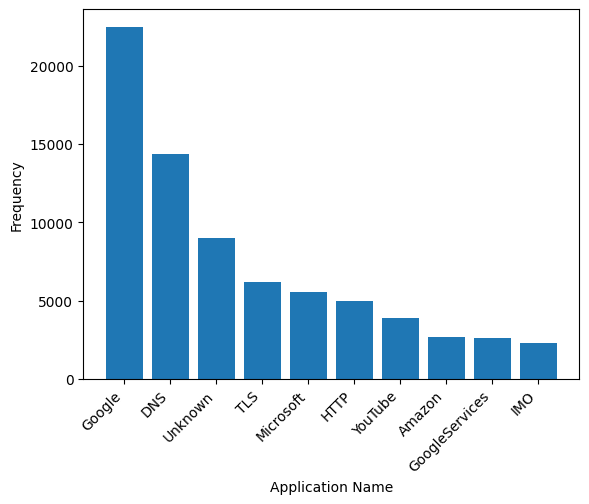

In [13]:
# Extract application names and their frequencies
application_name = freq.index.tolist()
frequency_count = freq.tolist()

print("Number of Unique Application Names: ", len(application_name))

# Graph of top 10 application names
top_values = 10
plt.bar(application_name[:top_values], frequency_count[:top_values])
plt.xlabel("Application Name")
plt.ylabel("Frequency")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
# Show the plot
plt.show()

In [14]:
# filtering the classes which have more than 10000 rows (occurrences)

requiredProtocolName = []
for key, value in freq.items():
    if (value >= 10000):
        requiredProtocolName.append(key)

print(requiredProtocolName)

['Google', 'DNS']


In [15]:
# converting the protocol name (target column) to required format (int)
from sklearn.preprocessing import LabelEncoder
values = df['web_service']
encoder = LabelEncoder()
df['web_service'] = encoder.fit_transform(df['web_service'])
# values = encoder.inverse_transform(df['web_service'])
# mapping the encoded value
encoded_target_column = {}
for i in range(len(df['web_service'])):
    encoded_target_column[df['web_service'][i]] = values[i]

print(encoded_target_column)

{10: 'DHCP', 27: 'ICMP', 25: 'HTTP', 37: 'Microsoft', 70: 'WindowsUpdate', 64: 'Unknown', 11: 'DNS', 49: 'RX', 58: 'TLS', 39: 'NetBIOS', 23: 'GoogleServices', 0: 'Amazon', 34: 'MSN', 72: 'Yahoo', 35: 'MS_OneDrive', 17: 'Google', 13: 'Dropbox', 15: 'GMail', 62: 'UbuntuONE', 19: 'GoogleDrive', 73: 'YouTube', 26: 'HTTP_Proxy', 38: 'NTP', 2: 'Apple', 6: 'AppleiTunes', 4: 'AppleStore', 3: 'ApplePush', 5: 'AppleiCloud', 28: 'IMAPS', 29: 'IMO', 41: 'Office365', 55: 'Skype', 9: 'Cloudflare', 56: 'Spotify', 31: 'LDAP', 61: 'Twitter', 14: 'Facebook', 32: 'LinkedIn', 30: 'Instagram', 1: 'AmazonVideo', 22: 'GooglePlus', 16: 'Github', 18: 'GoogleDocs', 60: 'Teredo', 7: 'BitTorrent', 36: 'Messenger', 67: 'WhatsApp', 46: 'PlayStore', 42: 'Ookla', 63: 'Unencrypted_Jabber', 51: 'SMBv23', 69: 'Wikipedia', 48: 'QUIC', 54: 'Signal', 8: 'CiscoVPN', 59: 'TeamViewer', 65: 'VNC', 40: 'NetFlix', 47: 'Playstation', 44: 'PS_VUE', 71: 'Xbox', 21: 'GoogleMaps', 20: 'GoogleHangoutDuo', 33: 'MQTT', 50: 'Radius', 52:

In [16]:
#  get all the column heads
df.columns

Index(['flow_key', 'src_ip_numeric', 'src_ip', 'src_port', 'dst_ip',
       'dst_port', 'proto', 'pktTotalCount', 'octetTotalCount', 'min_ps',
       'max_ps', 'avg_ps', 'std_dev_ps', 'flowStart', 'flowEnd',
       'flowDuration', 'min_piat', 'max_piat', 'avg_piat', 'std_dev_piat',
       'f_pktTotalCount', 'f_octetTotalCount', 'f_min_ps', 'f_max_ps',
       'f_avg_ps', 'f_std_dev_ps', 'f_flowStart', 'f_flowEnd',
       'f_flowDuration', 'f_min_piat', 'f_max_piat', 'f_avg_piat',
       'f_std_dev_piat', 'b_pktTotalCount', 'b_octetTotalCount', 'b_min_ps',
       'b_max_ps', 'b_avg_ps', 'b_std_dev_ps', 'b_flowStart', 'b_flowEnd',
       'b_flowDuration', 'b_min_piat', 'b_max_piat', 'b_avg_piat',
       'b_std_dev_piat', 'flowEndReason', 'category', 'application_protocol',
       'web_service'],
      dtype='object')

In [17]:
# removing extra columns that are not useful for finding correlation
# axis = 1 because we need to drop the columns
df.drop(['flow_key','src_ip','dst_ip','category','application_protocol'],axis=1,inplace=True)

In [18]:
x=df.drop(['web_service'],axis=1).values
y=df['web_service'].values

In [19]:
#Training and testing of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [20]:
#normalisation using robustscaler
#Robust scaler works well on features with outliers
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [21]:
# finding the correlation matrix
correlation_matrix = df.corr()
correlation_matrix.head()

,src_ip_numeric,src_port,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,...,b_std_dev_ps,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,web_service
src_ip_numeric,1.000000,0.101789,0.133442,-0.251042,0.012847,0.005765,-0.052327,0.065118,0.052380,0.080151,...,0.088849,0.017758,0.017758,0.176571,-0.004123,-0.004750,-0.006401,-0.004414,0.204404,0.139305
src_port,0.101789,1.000000,0.060783,0.006661,-0.012756,-0.019184,-0.034644,-0.006062,0.019376,0.005169,...,-0.009174,0.107257,0.107257,-0.041031,0.003471,-0.053188,-0.001795,-0.043073,0.028842,-0.011843
dst_port,0.133442,0.060783,1.000000,0.085953,0.122968,0.093603,0.041562,-0.020962,-0.021119,-0.029435,...,-0.030772,-0.204882,-0.204882,0.020301,-0.005450,-0.030208,-0.012128,-0.032498,-0.049187,0.171912
proto,-0.251042,0.006661,0.085953,1.000000,-0.023704,-0.034463,0.280698,-0.331335,-0.248286,-0.355126,...,-0.365949,-0.125753,-0.125754,-0.685682,0.045003,-0.155657,-0.000429,-0.202969,-0.720048,-0.324232
pktTotalCount,0.012847,-0.012756,0.122968,-0.023704,1.000000,0.919235,-0.009124,0.137524,0.116655,0.094411,...,0.059118,0.015164,0.015164,0.062951,-0.002935,0.009428,-0.004547,-0.004629,0.001766,0.043452


<Axes: >

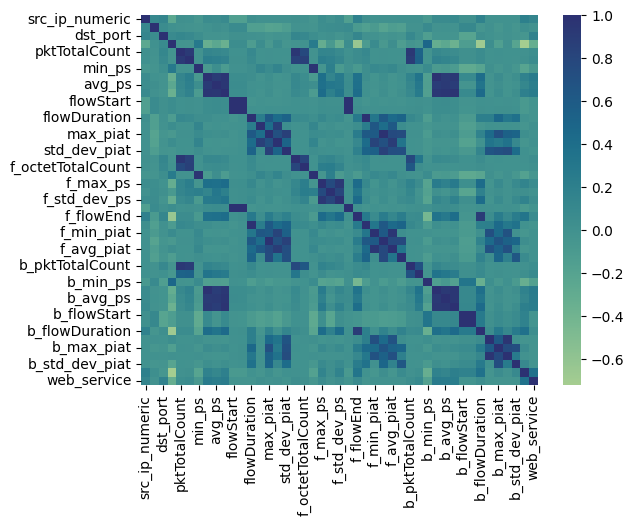

In [22]:
sns.heatmap(correlation_matrix, cmap="crest")

**feature selection using correlation matrix**

In [23]:
# choosing the best 1-25 features from same correlated values
sorted_corr_matrix_web_service= correlation_matrix['web_service'].abs().sort_values(ascending=False)

# Get the top 29 correlated features
final_features= sorted_corr_matrix_web_service[1:26]  # Exclude the 'web_services' itself

print("Top 29 features with the highest absolute correlation with ProtocolName: \n")
print(final_features.index.tolist())

Top 29 features with the highest absolute correlation with ProtocolName: 

['flowEndReason', 'proto', 'b_max_ps', 'max_ps', 'b_avg_ps', 'std_dev_ps', 'b_std_dev_ps', 'avg_ps', 'b_min_ps', 'dst_port', 'src_ip_numeric', 'b_octetTotalCount', 'min_ps', 'f_flowEnd', 'f_max_ps', 'octetTotalCount', 'f_min_ps', 'b_pktTotalCount', 'pktTotalCount', 'b_flowDuration', 'f_pktTotalCount', 'flowDuration', 'f_std_dev_ps', 'b_max_piat', 'f_flowDuration']


In [24]:
# Choose the top 25 features with the highest absolute correlation with 'web services'
top_25_features=sorted_corr_matrix_web_service.index[1:26]
# Create a DataFrame with these selected features and a copy of the 'ProtocolName' column
data_for_prediction_featureSelection = df[top_25_features].copy()
data_for_prediction_featureSelection['web_service'] = df['web_service']


# Split the data for feature selection via correlation matrix
x1=data_for_prediction_featureSelection.drop(['web_service'], axis=1).values
y1=data_for_prediction_featureSelection['web_service'].values
feature_train, feature_test, target_train, target_test = train_test_split(x1,y1, test_size=0.2,random_state=0)

In [25]:
feature_train = scaler.fit_transform(feature_train)
feature_test = scaler.transform(feature_test)

In [26]:
# standardizing the dataset and spliting the original data
feature_train_std, feature_test_std, target_train_std, target_test_std = train_test_split(x, y, test_size=0.2,random_state=0)
feature_train_std = scaler.fit_transform(feature_train_std)
feature_test_std = scaler.transform(feature_test_std)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
feature_train_pca= pca.fit_transform(feature_train_std)
feature_test_pca = pca.transform(feature_test_std)

print(feature_train_pca.shape, feature_test_pca.shape)

(73981, 13) (18496, 13)


In [28]:
# random forest on original dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier(n_estimators=200,criterion='entropy')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy score of original dataset',accuracy_score(y_test,y_pred))


Accuracy score of original dataset 0.879163062283737


In [29]:
# random forest on feature selection based on correlation matrix data
from sklearn.ensemble import RandomForestClassifier
rf_feature=RandomForestClassifier(n_estimators=200,criterion='gini')
rf_feature.fit(feature_train,target_train)
y_pred_feature=rf_feature.predict(feature_test)
print('Accuracy score of random forest on feature selection based on correlation matrix data',accuracy_score(target_test,y_pred_feature))

Accuracy score of random forest on feature selection based on correlation matrix data 0.8758109861591695


In [30]:
# random forest on PCA
from sklearn.ensemble import RandomForestClassifier
rf_pca=RandomForestClassifier(n_estimators=200,criterion='entropy')
rf_pca.fit(feature_train_std, target_train_std)
y_pred_pca=rf_pca.predict(feature_test_std)
print('Accuracy score of random forest on pca',accuracy_score(target_test_std,y_pred_pca))

Accuracy score of random forest on pca 0.8786764705882353


 OneClassSVM is used for anomalies detection

In [31]:
# prediction anomalies in original dataset
from sklearn.svm import OneClassSVM
one_class_svm=OneClassSVM(nu=.01,kernel='poly',gamma='auto').fit(x_train)
# predict anomalies
predictions=one_class_svm.predict(x_test)
# check model performance
print('Accuracy score',accuracy_score(y_test,predictions))



Accuracy score 0.0011353806228373703


In [32]:
predictions=np.array(predictions)
# Predict the anomalies
print(len(predictions[predictions == -1]), " anomalies from ", len(predictions))

168  anomalies from  18496


In [34]:
#Checking the anomalies in dataseton feature selection using correlation
one_class_svm=OneClassSVM(nu=.01,kernel='rbf',gamma='auto').fit(feature_train)
# predict anomalies
prediction=one_class_svm.predict(feature_test)
# check model performance
print('Accuracy score',accuracy_score(target_test,prediction))

Accuracy score 0.0010813148788927337


In [35]:
# Predict the anomalies
print(len(prediction[prediction == -1]), " anomalies from ", len(prediction))

1740  anomalies from  18496


In [36]:
# prediction of anomalies in pca
one_class_svm=OneClassSVM(nu=.01,kernel='rbf',gamma='auto').fit(feature_train_std)
# predict anomalies
prediction_pca=one_class_svm.predict(feature_test_std)
# change the anomalies values to make it consistent with true values
prediction_pca=[1 if i==-1 else 0 for i in prediction_pca]
# check model performance
print('Accuracy score',accuracy_score(target_test_std,prediction_pca))


Accuracy score 0.018490484429065743


In [37]:
# Predict the anomalies
print(len(prediction[prediction == -1]), " anomalies from ", len(prediction))

1740  anomalies from  18496
